In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import src.Models as mp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
%matplotlib inline 

In [30]:
def load_data(parent_dir, exp_id, fn):
    path = parent_dir + '/' + exp_id + '/'
    npz = np.load(path + fn, allow_pickle=True).item()
    return npz

def plot_fit(amo, lims, title):

    # To do: Temporarly these labels are default.
    #params = ['x','y','z']
    params = ['Geometric Mean Radius [$\mu$m]', 'Geometric Standard Deviation [$\sigma$]', 'Supersaturation [%]']

    fig = plt.figure(figsize=[12,6])
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    #fig, ax = plt.subplots(figsize=[8,6], projection='3d')
    
    M = 50; 
    grid0 = np.linspace(lims[0][0],lims[0][1],M).reshape(M,1); 
    grid1 = np.linspace(lims[1][0],lims[1][1],M).reshape(M,1);
    XX1,XX2 = np.meshgrid(grid0,grid1)

    #print('xxxx', amo.data['X'])
    #print('predict', amo.emudict['emu0'].predict(amo.data['X']).ravel())
    #print('predict', [[amo.emudict['emu0'].predict( np.array([amo.data['X'][i,j], amo.data['Y'][i,j] ]).reshape(1,2) )[0,0] for i in range(M)] for j in range(M)])
    ax.scatter3D(amo.data['X'][:,0], amo.data['X'][:,1], amo.data['Y'], marker='.', alpha=0.4, c='r')

    # amo.emudict['emu0'] I will have many emulator if P >= 2 and need to change 'emuXXX'.
    Z = [[amo.emudict['emu0'].predict( np.array([XX1[i,j], XX2[i,j] ]).reshape(1,2) )[0,0] for i in range(M)] for j in range(M)]
    #Z = [[amo.emudict['emu0'].predict( np.array([XX1[i,j], XX2[i,j] ]).reshape(1,3) )[0,0] for i in range(M)] for j in range(M)]
    Z = np.array(Z).T
    
    #min_val, max_val = min(amo.data['Y']), max(amo.data['Y'])

    # use the coolwarm colormap that is built-in, and goes from blue to red
    #cmap = mpl.cm.coolwarm
    #norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)

    ax.plot_surface(XX1, XX2, Z, alpha=0.9, cmap='YlGnBu', rstride=1, cstride=1)
    #ax.plot_surface(XX1, XX2, Z, rstride=1, cstride=1, alpha=0.9, cmap='YlGnBu')
    #ax.plot_surface(XX1, XX2, Z, rstride=1, cstride=1, alpha=0.6, cmap=cmap, norm=norm)

    fsize = 9
    ax.set_xlabel(params[0], fontsize=fsize), ax.set_ylabel(params[1], fontsize=fsize), ax.set_zlabel(params[2], fontsize=fsize, labelpad=8.5)
    ax.set_box_aspect(aspect=None, zoom=0.8)
    ax.set_title(title)
    ax.set_zlim(0.3,1.3)

def plot_2d(amo, lims):
    fig, ax = plt.subplots(figsize=[8,6])
    #ax = fig.add_subplot(1, 3, 3)
    
    M = 50
    lim0 = np.linspace(lims[0][0],lims[0][1],M).reshape(M,1)
    lim1 = np.linspace(lims[1][0],lims[1][1], M).reshape(M,1)
    x0, x1 = np.meshgrid(lim0, lim1)
    #ack = [[ np.float64( acq(np.array([[ x0[i, j], x1[i, j] ]])).item() )
    #        for i in range(M)] for j in range(M)]
    #ack = np.array(ack).T
    #print('ACK', ack)

    Z = [[amo.emudict['emu0'].predict( np.array([x0[i,j], x1[i,j] ]).reshape(1,2) )[0,0] for i in range(M)] for j in range(M)]
    #Z = [[amo.emudict['emu0'].predict( np.array([[x0[i,j], x1[i,j]] ]).item() ) for i in range(M)] for j in range(M)]
    print(Z)

    #im=ax.imshow(Z, origin='lower',extent=[lims[0][0],lims[0][1],lims[1][0],lims[1][1]], interpolation='gaussian', aspect='auto')
    im = ax.contourf(x0, x1, Z, cmap=cm.PuBu_r)
    ax.scatter(amo.data['X'][:,0], amo.data['X'][:,1])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    #cax = fig.add_axes([0.67, 0.1, 0.5, 0.05])
    #fig.colorbar(im, cax=cax, orientation='vertical')
    
    ax.set_ylabel('x'), ax.set_xlabel('y') 
    

In [31]:
parent_dir = os.path.join(os.getcwd(), 'experiments')
exp_id = str('1062')
fn_tracker = 'tracker_ae_rnd.npy'
fn_emu_ae = 'emulator_ae.npy'
fn_emu_rnd = 'emulator_rnd_gauss.npy'
fn_emu_lhs = 'emulator_lhs.npy'

In [32]:
tracker = load_data(parent_dir, exp_id, fn_tracker)
emulator_ae = load_data(parent_dir, exp_id, fn_emu_ae)
emulator_rnd = load_data(parent_dir, exp_id, fn_emu_rnd)
emulator_lhs = load_data(parent_dir, exp_id, fn_emu_lhs)

In [33]:
emulator_rnd.data['X'].shape

(33, 2)

In [34]:
emulator_ae.data['X'].shape

(33, 2)

In [35]:
np.argmax(emulator_lhs.emudict['emu0'].predict(emulator_ae.data['X']))

24

In [36]:
emulator_ae.data['Y']

array([[0.68677071],
       [0.40896748],
       [0.55331354],
       [0.51063722],
       [0.45450415],
       [0.8095987 ],
       [0.4311313 ],
       [0.9865076 ],
       [0.51582304],
       [0.38425806],
       [0.49791798],
       [0.56658758],
       [0.50737795],
       [0.41091998],
       [0.70169837],
       [0.48277697],
       [0.64184124],
       [0.67821798],
       [0.42114652],
       [0.46917896],
       [0.59057496],
       [0.46181   ],
       [0.52724439],
       [0.41785616],
       [0.76011305],
       [0.56453785],
       [1.24887892],
       [0.45344677],
       [0.37004785],
       [0.40309054],
       [0.50271525],
       [0.78946301],
       [0.45054612]])

In [37]:
np.max(emulator_ae.data['Y'])

1.2488789249198429

In [38]:
np.argmax(emulator_ae.data['Y'])

26

In [39]:
emulator_lhs.data['X'].shape

(33, 2)

In [40]:
ranges = np.array([[0.02, 0.07], [1.1, 2.0]])

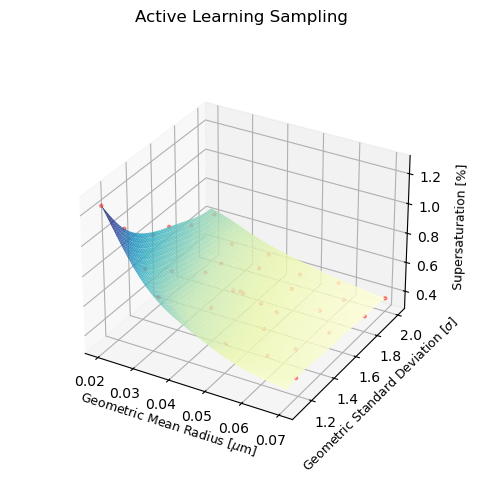

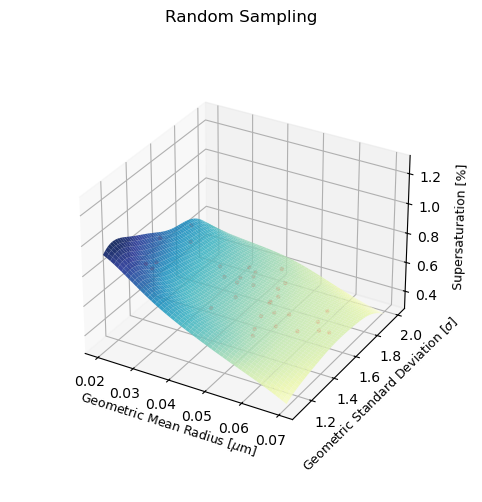

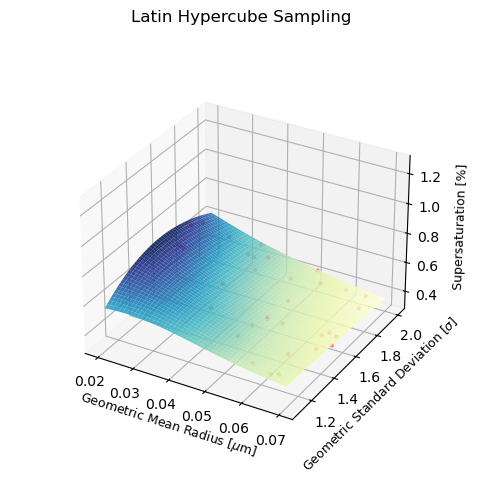

In [41]:
plot_fit(emulator_ae, ranges, 'Active Learning Sampling')
plot_fit(emulator_rnd, ranges, 'Random Sampling')
plot_fit(emulator_lhs, ranges, 'Latin Hypercube Sampling')

[[1.2488786395405775, 1.21887313764456, 1.188149703869047, 1.1573306379476764, 1.12695836240495, 1.0974842449528457, 1.0692626416334832, 1.0425501524872256, 1.017509754961892, 0.9942191842171589, 0.972682685765276, 0.9528450923602619, 0.9346070859816035, 0.9178405027542179, 0.9024026221201605, 0.8881485428223445, 0.8749409721881076, 0.862657021635807, 0.8511918867691579, 0.8404595701204257, 0.83039105474921, 0.8209305367316198, 0.812030458186013, 0.8036461402248718, 0.795730794457435, 0.7882315969133684, 0.7810873506732132, 0.774228059706937, 0.7675765069416354, 0.7610516968084504, 0.7545738086380671, 0.7480701322381751, 0.7414813366886599, 0.7347673683107855, 0.7279122881373155, 0.7209274407635036, 0.7138524868104612, 0.7067540168167212, 0.6997216778086003, 0.692861965580726, 0.6862900460453266, 0.6801201495524469, 0.6744552175981084, 0.6693765608702942, 0.664934305312449, 0.6611393583967768, 0.6579575259466687, 0.65530626006605, 0.6530543340703724, 0.6510245361382581], [1.20658509307

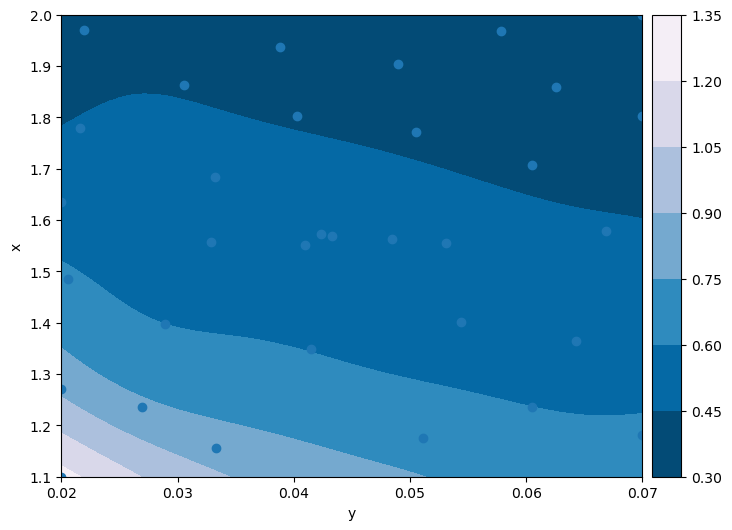

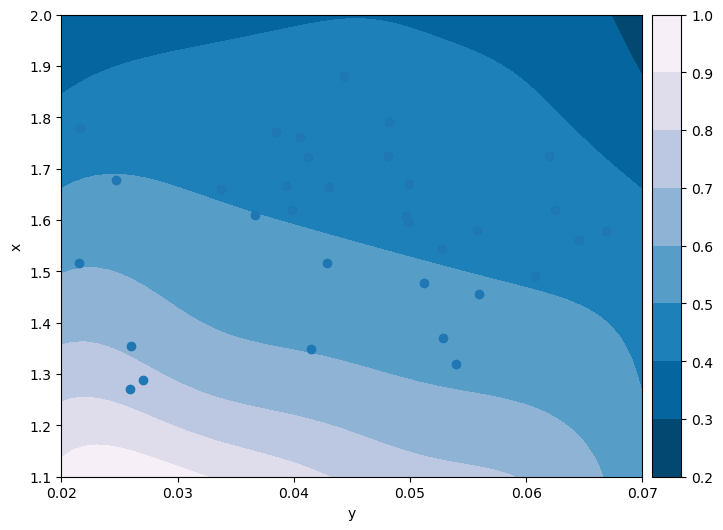

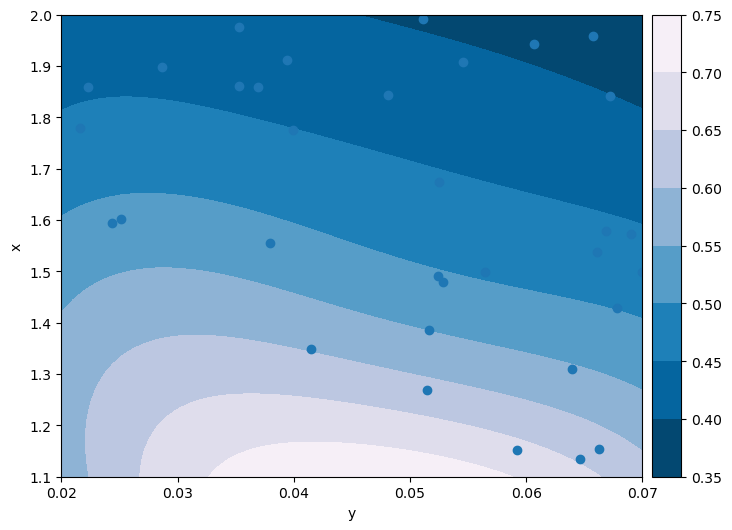

In [42]:
plot_2d(emulator_ae, ranges)
plot_2d(emulator_rnd, ranges)
plot_2d(emulator_lhs, ranges)